In [1]:
# -*- coding: utf-8 -*-
print('EDGE-ON TEST END')
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.constants as c
from scipy.stats import binned_statistic_2d, binned_statistic
from astropy.io import fits
import pandas as pd
import random
from numpy import cos,sin
from numpy import deg2rad,rad2deg
from loadmodules import *


EDGE-ON TEST END



Bad key text.latex.preview in file /opt/anaconda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

In [2]:
def ruido(n,sig,sup):
	return (-1*np.abs(np.random.randn(n)*sig)) + sup #RUIDO



def StellarDensity2D(x,y,weights,minMax,statistic='sum',npix = [200,200],style='SB'):
    grid, _x, _y, _ = binned_statistic_2d(x, y, weights, statistic, bins=npix, range=[minMax,minMax])
    box=np.abs(_x[1]-_x[0])#k['box']
    #minMax = [0, 1]
    if style=='normal': return grid,box
    if statistic=='sum':
        
        if style=='SB':
            #box_arcsec = np.rad2deg(np.arctan(box*1000/10))*(60*60)
            box_arcsec = (2*box*1000/10)*((180*60*60)/np.pi)
            return -2.5*np.log10(grid / box_arcsec**2),_x,_y,box
        if style=='SD':
            return grid / box**2,_x,_y,box
    if statistic!='sum':
        print('statistic i not sum')
        raise SystemExit




def gen_fits(H,sup,tt,count):
	mvs = np.ravel(H)
	#ind = np.where([mvs[:] == np.inf])[1]
	ind = np.where([mvs[:] > sup])[1]
	noise=ruido(len(mvs),0.25,sup)
	ff = mvs
	
############# RUIDO AGREGADO ##########################
	#ff[ind] = noise[ind]
	#test = np.where(ff > noise)[0]
	#ff[test] = noise[test]
	
	#ffnorm = (ff-np.min(ff))/(np.max(ff)-np.min(ff))
	
	#fff = np.reshape(ffnorm,[len(H),len(H)])

################# CLEAN #####################
	
	ff[ind] = sup
	ffnorm = (ff-np.min(ff))/(np.max(ff)-np.min(ff))
	fff = np.reshape(ffnorm,[len(H),len(H)])

###############	FITS
	
	hdu = fits.PrimaryHDU(fff,scale_back=True)
	hdul = fits.HDUList([fits.PrimaryHDU(fff)])
	
	hdul.writeto(f'/data/processing/avera/proyecto_deep/fits_NEW/AU{au}_snap{i}_inc{tt}_SB{sup}.fits',overwrite=True)
	hdul.close()


############## stamps

	#plt.figure(figsize=[4,4])
	#plt.imshow(fff,cmap='gray', origin='lower', vmin=18,vmax=sup, interpolation='none')
	#plt.tick_params(color='w', labelleft=False,labelbottom=False) 
	#plt.savefig(f'/data/processing/avera/proyecto_deep/stamps_noise/AU{au}_snap{i}_sb{sup}_rot{tt}.png')
	#plt.savefig(f'test_sb{sup}_rot{tt}.png')
	#plt.close()

def ROT(theta):
    rotx = np.matrix([[1,0,0],[0,cos(theta),-sin(theta)],[0,sin(theta),cos(theta)]])
    roty = np.matrix([[cos(theta),0,sin(theta)],[0,1,0],[-sin(theta),0,cos(theta)]])
    rotz = np.matrix([[cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]])   
    return rotx,roty,rotz

In [3]:
lbt = np.sort(np.genfromtxt('lookback_time_128')/1e9)
fact_esc = np.genfromtxt('ExpansionList_128')
redsfhit = np.sort((1-fact_esc)/fact_esc)
d = {'lbt': lbt, 'ss': np.arange(127,-1,-1), 'z': redsfhit}
edad = pd.DataFrame(d)

In [4]:
dirs = '/data/repository/Level_4/halo_'
treepaths = '/data/repository/Level_4/mergertrees/'
fexp = 'ExpansionList_128'
expansion_fact = np.loadtxt(fexp)
loadptype = [4]
loadonlyproop=['pos', 'vel', 'mass', 'age', 'id','type','gz','gsph','bpos'] # propiedades de las particulas en el snap
fields_subhalo = ['flty','spos','sidm','fpos','frc2','slty','svel','fnsh','smas']

#ss = [127, 124, 121, 118, 115, 112, 109, 106, 103, 100, 97, 94, 90, 87, 84, 81]
count = 0
#ss = [127]
#ss = [125,123,121,119,117,115,113,111,109,107,105,103,101,99,98,96]
ss = [124,122,120,118,116,114,112,110,108,106,104,102]
#agegyr = np.genfromtxt('lookback_time_128')
snap=127

auriga: 1
snapshot: 107
Total particles per type: [      0       0       0       0 1362528       0]
galrad= 0.019089092314243317
!!! agesel
Found 6104 stars.
Rotated pos.
Rotated vel.


/tmp/ipykernel_10829/1264167838.py:16: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(grid / box_arcsec**2),_x,_y,box


snapshot: 108
Total particles per type: [      0       0       0       0 1364924       0]
galrad= 0.019189572334289553
!!! agesel
Found 6006 stars.
Rotated pos.
Rotated vel.
snapshot: 109
Total particles per type: [      0       0       0       0 1368801       0]
galrad= 0.019359827041625977
!!! agesel
Found 6543 stars.
Rotated pos.
Rotated vel.
snapshot: 110
Total particles per type: [      0       0       0       0 1375122       0]
galrad= 0.019513048231601715
!!! agesel
Found 6982 stars.
Rotated pos.
Rotated vel.
snapshot: 111
Total particles per type: [      0       0       0       0 1380563       0]
galrad= 0.019634324312210086
!!! agesel
Found 7812 stars.
Rotated pos.
Rotated vel.


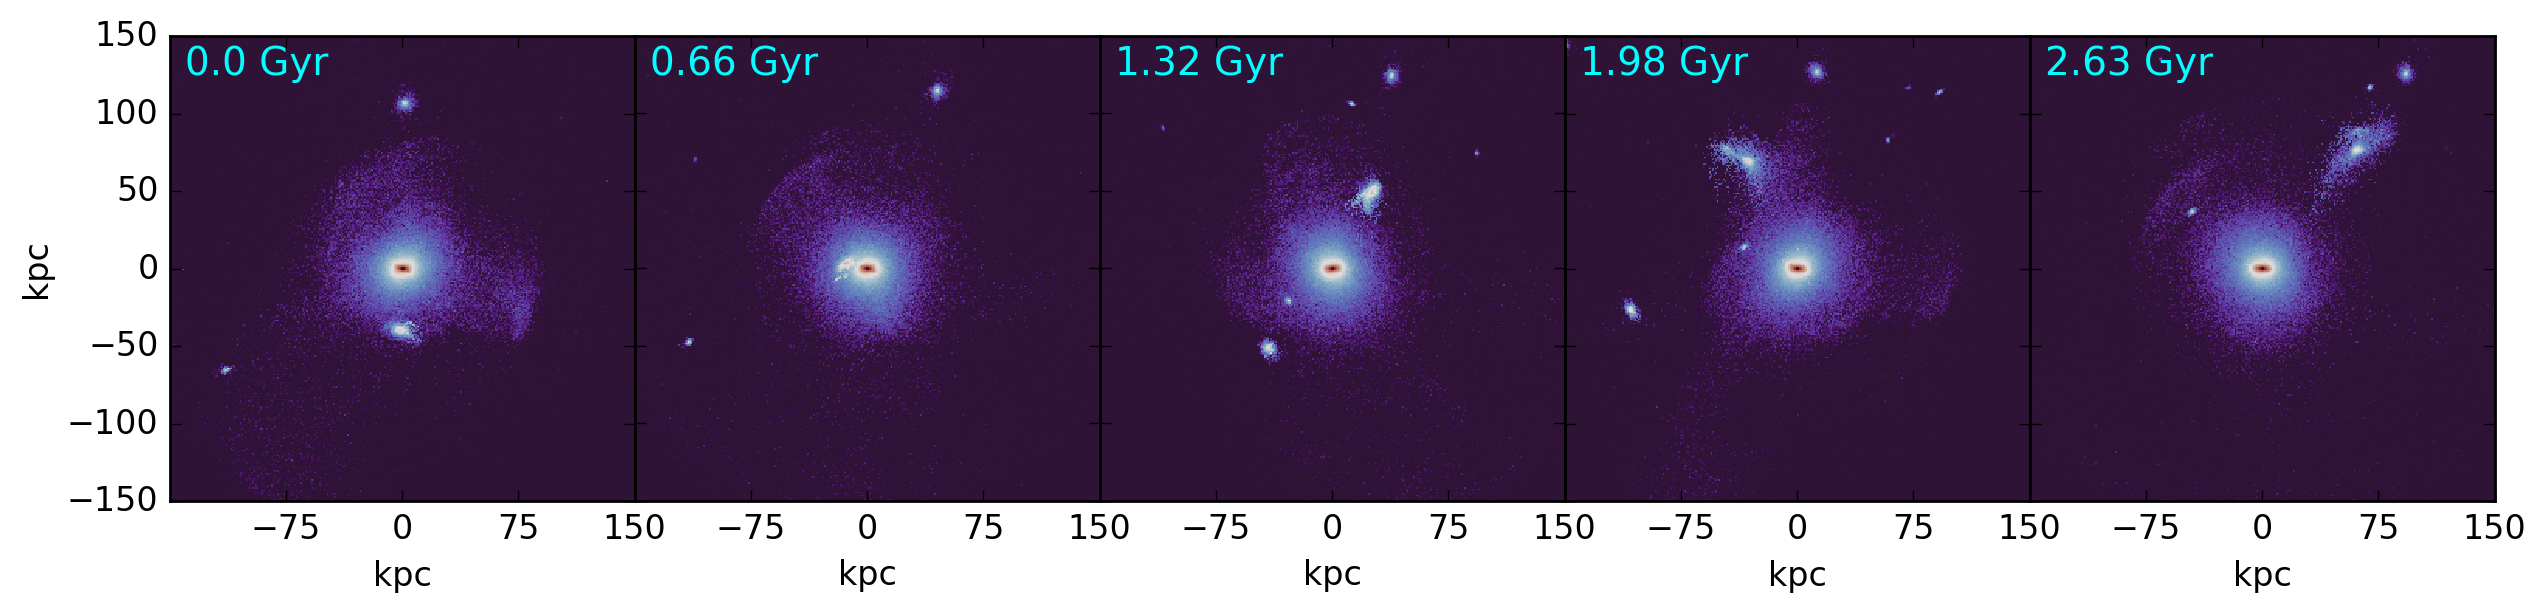

In [92]:
for au in range(1,2):
    print(f'auriga: {au}')
    f, axs = plt.subplots(1,5, sharex='col', sharey='row',figsize=[15,3],dpi=200)
    axs=axs.ravel()
    f.subplots_adjust(hspace=0.0,wspace=0.0)#right=0.85)#, bottom=0.05, top = 0.95)
    f.patch.set_facecolor('xkcd:white')
    count=0
    for i in range(107,112,1):
        print(f'snapshot: {i}')
        snap=i

        path = '/data/repository/Level_4/halo_%s/output/'%au
        sf = load_subfind(snap, dir=path, loadonly=fields_subhalo)
        lenstars  = sf.data['slty'][0,4]
        first_snap = gadget_readsnap(snap, snappath=path, hdf5=True, loadonlytype=[4], loadonlyhalo=0, subfind=sf, loadonly=['pos','vel','id','age','mass','pot','type', 'gsph', 'gz'])
# edades en Gyr
        part_ages1 = first_snap.data['age']          # entrega el factor de escala
        part_agesGyr1 = first_snap.cosmology_get_lookback_time_from_a(part_ages1, is_flat=True)

########### FAST ROTATION  ######################
        numstars, = np.where((first_snap.data['type'] == 4))
        a = first_snap.calc_sf_indizes(sf, verbose=True)
        first_snap.select_halo(sf, age_select = 3., use_cold_gas_spin=False, do_rotation=True) 
####### ROTACION EN EJE Z ##################
        #rots = ['00','30','45','60','90']
        rots = ['00']
        #rots = np.random.randint(9,90,2)
        #f, axs = plt.subplots(1,5, sharex='col', sharey='row',figsize=[15,3], )
        #axs=axs.ravel()
        #f.patch.set_facecolor('xkcd:white')
        for t,tt in enumerate(rots):
            sela = first_snap.pos*1000.0
            selb = first_snap.data_type4['gsph']
            cuty = abs(sela[:,1]) <= 350
            sela = sela[cuty]
            selb = selb[cuty]
##########################################

            rotx,roty,rotz = ROT(deg2rad(int(tt))) 
            selpos = np.array(np.dot(sela,rotx))
            
########################################

            flux = 10. ** (-0.4 * selb[:,5])
            tam = 150
            minMax = [-tam,tam]
            npx = tam*2
            inf = 18

            #f.subplots_adjust(hspace=0.0,wspace=0.0)#right=0.85)#, bottom=0.05, top = 0.95)
            H,_x,_y,boxl = StellarDensity2D(selpos[:,0],selpos[:,2],flux,minMax,npix = [npx,npx],style='SB')
            mvs = np.ravel(H)
            ind = np.where([mvs[:] == np.inf])[1]
            ff = mvs
            ff[ind] = 1000
            ffnorm = (ff-np.min(ff))/(np.max(ff)-np.min(ff))
            fff = np.reshape(ffnorm,[len(H),len(H)])            
            sup=32
            #axs[t].imshow(H,origin='lower',interpolation='none',vmin=18,vmax=sup,extent=(-150,150,-150,150),cmap='twilight_shifted_r')
            #axs[t].text(-tam+10,tam-25,f'rot = {tt}°', color='cyan',fontsize=14)
            #axs[t].set(xlim=(-tam,tam),ylim=(-tam,tam), xticks=np.arange(tam,-tam,-tam/2),xlabel='kpc')
            axs[count].imshow(H,origin='lower',interpolation='none',vmin=18,vmax=sup,extent=(-150,150,-150,150),cmap='twilight_shifted_r')
            axs[count].text(-tam+10,tam-25,f'{np.round(edad["lbt"][count*4],2)} Gyr', color='cyan',fontsize=14)
            axs[count].set(xlim=(-tam,tam),ylim=(-tam,tam), xticks=np.arange(tam,-tam,-tam/2),xlabel='kpc')
            count+=1

    axs[0].set(ylabel='kpc')
    plt.show()
    plt.close()



auriga: 1
snapshot: 126
Total particles per type: [      0       0       0       0 2632538       0]
galrad= 0.020199665427207948
!!! agesel
Found 49987 stars.
Rotated pos.
Rotated vel.


/tmp/ipykernel_10829/1264167838.py:16: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(grid / box_arcsec**2),_x,_y,box


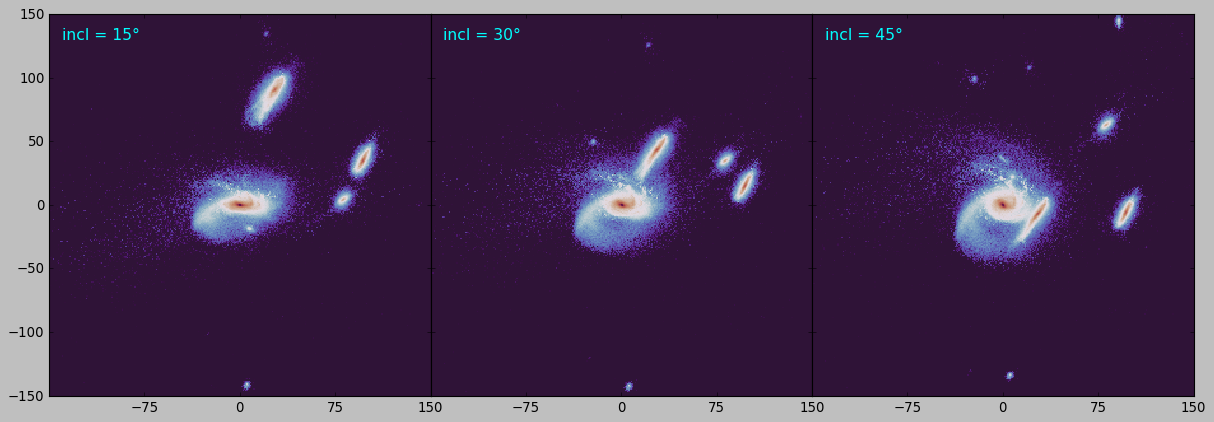

auriga: 2
snapshot: 126
Total particles per type: [      0       0       0       0 3074896       0]
galrad= 0.026138946413993835
!!! agesel
Found 24895 stars.
Rotated pos.
Rotated vel.


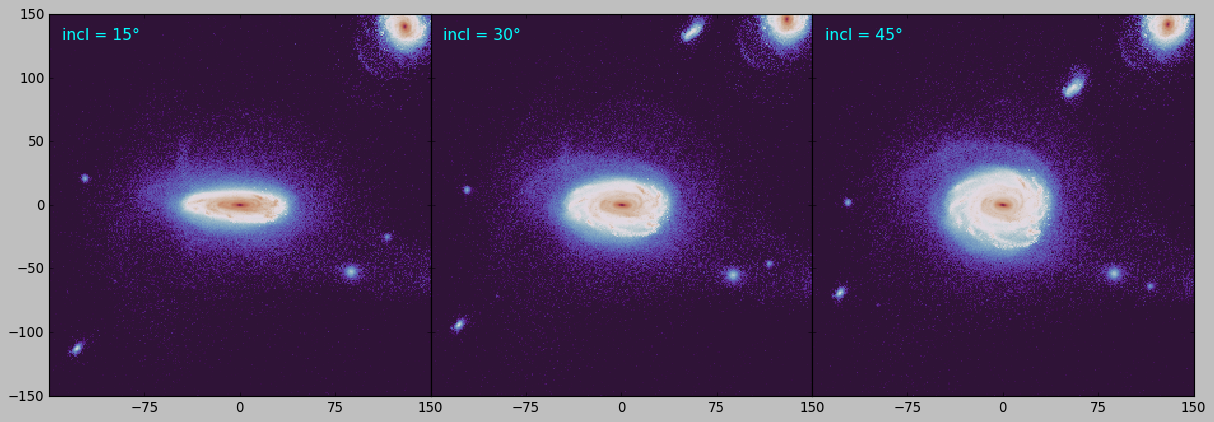

In [88]:
for au in range(1,3):
    print(f'auriga: {au}')
    for i in range(126,125,-1):
        print(f'snapshot: {i}')
        snap=i

        path = '/data/repository/Level_4/halo_%s/output/'%au
        sf = load_subfind(snap, dir=path, loadonly=fields_subhalo)
        lenstars  = sf.data['slty'][0,4]
        first_snap = gadget_readsnap(snap, snappath=path, hdf5=True, loadonlytype=[4], loadonlyhalo=0, subfind=sf, loadonly=['pos','vel','id','age','mass','pot','type', 'gsph', 'gz'])
# edades en Gyr
        part_ages1 = first_snap.data['age']          # entrega el factor de escala
        part_agesGyr1 = first_snap.cosmology_get_lookback_time_from_a(part_ages1, is_flat=True)

########### FAST ROTATION  ######################
        numstars, = np.where((first_snap.data['type'] == 4))
        a = first_snap.calc_sf_indizes(sf, verbose=True)
        first_snap.select_halo(sf, age_select = 3., use_cold_gas_spin=False, do_rotation=True) 
    #rotation(second_snap,sf,part_agesGyr2)
####### ROTACION EN EJE Z ##################
        #rots = ['00','30','45','60','90']
        rots = ['15','30','45']
        #rots = ['10','20','40']
        #rots = np.random.randint(9,90,2)
        f, axs = plt.subplots(1,3, sharex='col', sharey='row',figsize=[18.46,7.46], )
        axs=axs.ravel()
        for t,tt in enumerate(rots):
            sela = first_snap.pos*1000.0
            selb = first_snap.data_type4['gsph']
            #cuty = abs(sela[:,1]) <= 300
            cuty = np.linalg.norm(sela,axis=-1)<350
            sela = sela[cuty]
            selb = selb[cuty]
##########################################

            rotx,roty,rotz = ROT(deg2rad(int(tt)))
            selpos = np.array(np.dot(sela,rotz))
            
########################################

            flux = 10. ** (-0.4 * selb[:,5])
            tam = 150
            minMax = [-tam,tam]
            npx = tam*2
            inf = 18

            f.subplots_adjust(hspace=0.0,wspace=0.0)#right=0.85)#, bottom=0.05, top = 0.95)
            H,_x,_y,boxl = StellarDensity2D(selpos[:,0],selpos[:,2],flux,minMax,npix = [npx,npx],style='SB')
            mvs = np.ravel(H)
            ind = np.where([mvs[:] == np.inf])[1]
            ff = mvs
            ff[ind] = 1000
            ffnorm = (ff-np.min(ff))/(np.max(ff)-np.min(ff))
            fff = np.reshape(ffnorm,[len(H),len(H)])            
            sup=32
            axs[t].imshow(H,origin='lower',interpolation='none',vmin=18,vmax=sup,extent=(-150,150,-150,150),cmap='twilight_shifted_r')
            axs[t].text(-tam+10,tam-20,f'incl = {tt}°', color='cyan',fontsize=14)
            axs[t].set(xlim=(-tam,tam),ylim=(-tam,tam), xticks=np.arange(tam,-tam,-tam/2)) 

        plt.show()
        plt.close()
        count += 1



In [8]:
from pandarallel import pandarallel
import pandas as pd
from astropy.io import fits
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
pandarallel.initialize( nb_workers=10)
import glob, os
def abrir_fits(ruta):
    hdu_list = fits.open(ruta,memmap=False)
    image_data = hdu_list[0].data
    hdu_list.close()
    return image_data


2024-11-19 18:51:53.790596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [73]:
def reset_keras():
    sess = tf.compat.v1.keras.backend.get_session()
    tf.compat.v1.keras.backend.clear_session()
    sess.close()
    sess = tf.compat.v1.keras.backend.get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))
    
reset_keras()